Q4. Campaign Impact Analysis 

○ What are the key performance indicators (KPIs) for assessing the success of
marketing campaigns?
○ Objective: Develop a framework for measuring campaign success using data
such as engagement rate, conversion rate, and customer lifetime value (CLV).
○ Expected Outcome: Propose actionable insights on how to improve marketing
Strategies.


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
#Importing Data
df_campaigns = pd.read_csv("../Data DSA3101/campaigns.csv")
df_engagement = pd.read_csv("../Data DSA3101/customer_engagement.csv")
df_churn_prob = pd.read_excel("../Data DSA3101/churn_probability.xlsx")
df_transactions = pd.read_csv("../Data DSA3101/transactions_summary.csv")

In [157]:
#Data cleaning and preprocessing
df = df_transactions.merge(df_engagement,on="customer_id",how="left")
df = df.merge(df_churn_prob,on="customer_id",how="left")
df = df.merge(df_campaigns[["campaign_id", "campaign_name"]], on="campaign_id", how="left")

binary_columns = ['sent','delivered','opened','clicked','conversion_status']
df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

df["engagement_time"] = pd.to_timedelta(df['engagement_time']).dt.total_seconds()
print(df.head())

   customer_id  days_since_last_transaction  current_balance  peak_month  \
0            1                           11      5694.487702          11   
1            2                           55      1738.012820           6   
2            2                           55      1738.012820           6   
3            2                           55      1738.012820           6   
4            2                           55      1738.012820           6   

   peak_month_spending  peak_month_frequency  total_transactions_3m  \
0         12893.350846                    48                     95   
1          2084.299245                    30                    106   
2          2084.299245                    30                    106   
3          2084.299245                    30                    106   
4          2084.299245                    30                    106   

   total_transactions_6m  total_transactions_12m  total_transaction_amount_3m  \
0                    217           

C:\Users\emily\AppData\Local\Temp\ipykernel_27536\2036033691.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})


In [158]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29540 entries, 0 to 29539
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      29540 non-null  int64  
 1   days_since_last_transaction      29540 non-null  int64  
 2   current_balance                  29540 non-null  float64
 3   peak_month                       29540 non-null  int64  
 4   peak_month_spending              29540 non-null  float64
 5   peak_month_frequency             29540 non-null  int64  
 6   total_transactions_3m            29540 non-null  int64  
 7   total_transactions_6m            29540 non-null  int64  
 8   total_transactions_12m           29540 non-null  int64  
 9   total_transaction_amount_3m      29540 non-null  float64
 10  total_transaction_amount_6m      29540 non-null  float64
 11  total_transaction_amount_12m     29540 non-null  float64
 12  average_transactio

In [159]:
print(df.describe())

        customer_id  days_since_last_transaction  current_balance  \
count  29540.000000                 29540.000000     29540.000000   
mean    5010.844821                    23.494381      6793.870851   
std     2887.939591                    35.462239      4675.937998   
min        1.000000                     0.000000     -2776.332936   
25%     2512.000000                     4.000000      3625.809532   
50%     5019.500000                    14.000000      5875.701446   
75%     7502.250000                    26.000000      8875.066186   
max    10000.000000                   200.000000     39748.029652   

         peak_month  peak_month_spending  peak_month_frequency  \
count  29540.000000         29540.000000          29540.000000   
mean       6.595701         16699.666485             43.233717   
std        3.585805         17534.768893             11.515244   
min        1.000000         -6275.590451             12.000000   
25%        3.000000          5997.673471        

In [175]:
df_sent = df[df["sent"]==1]
df_m= (
    df_sent.groupby('campaign_name').agg(
      deliver_rate = ('delivered','mean'),
      open_rate = ('opened','mean'),
      click_rate = ('clicked','mean'),
      conversion_rate = ('conversion_status', 'mean'),
      engagement_time_mean = ('engagement_time', 'mean'))
      .mul(100).reset_index()
)

df_m["engagement_time_scaled"] = (df_m["engagement_time_mean"] - df_m["engagement_time_mean"].min()) / (
    df_m["engagement_time_mean"].max() - df_m["engagement_time_mean"].min()
)

df_m["engagement_score"] = (
    0.3 * df_m["open_rate"] +
    0.5 * df_m["click_rate"] +
    0.2 * df_m["engagement_time_scaled"]
)

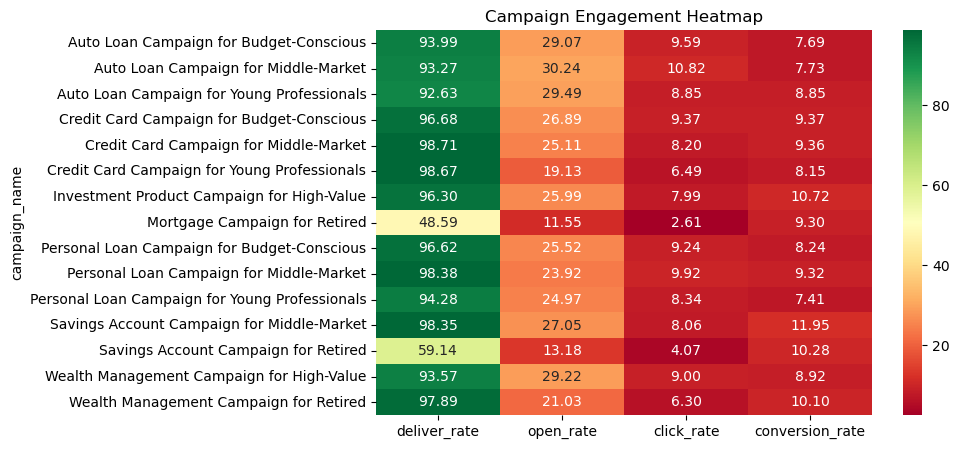

In [161]:
df_plt = df_m.drop("engagement_time_mean",axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_plt.set_index("campaign_name"),
    annot=True, cmap="RdYlGn", fmt=".2f"
)
plt.title("Campaign Engagement Heatmap")
plt.show()


In [163]:
profit_generated = (
  df_campaigns.groupby('campaign_name').agg(
    total_revenue = ('total_revenue_generated','sum'),
    total_campaign_cost=('total_campaign_cost','sum')
  )
  .mul(1/1000000)
  .assign(total_profit = lambda x:(x['total_revenue']-x['total_campaign_cost']))
  .reset_index()
  .sort_values(by="total_profit")
)

print(profit_generated.head())

                                   campaign_name  total_revenue  \
2     Auto Loan Campaign for Young Professionals       0.029155   
5   Credit Card Campaign for Young Professionals       0.086320   
3      Credit Card Campaign for Budget-Conscious       0.104820   
12          Savings Account Campaign for Retired       0.237155   
1           Auto Loan Campaign for Middle-Market       0.248383   

    total_campaign_cost  total_profit  
2              0.012412      0.016743  
5              0.057268      0.029052  
3              0.071483      0.033337  
12             0.137423      0.099732  
1              0.134700      0.113683  


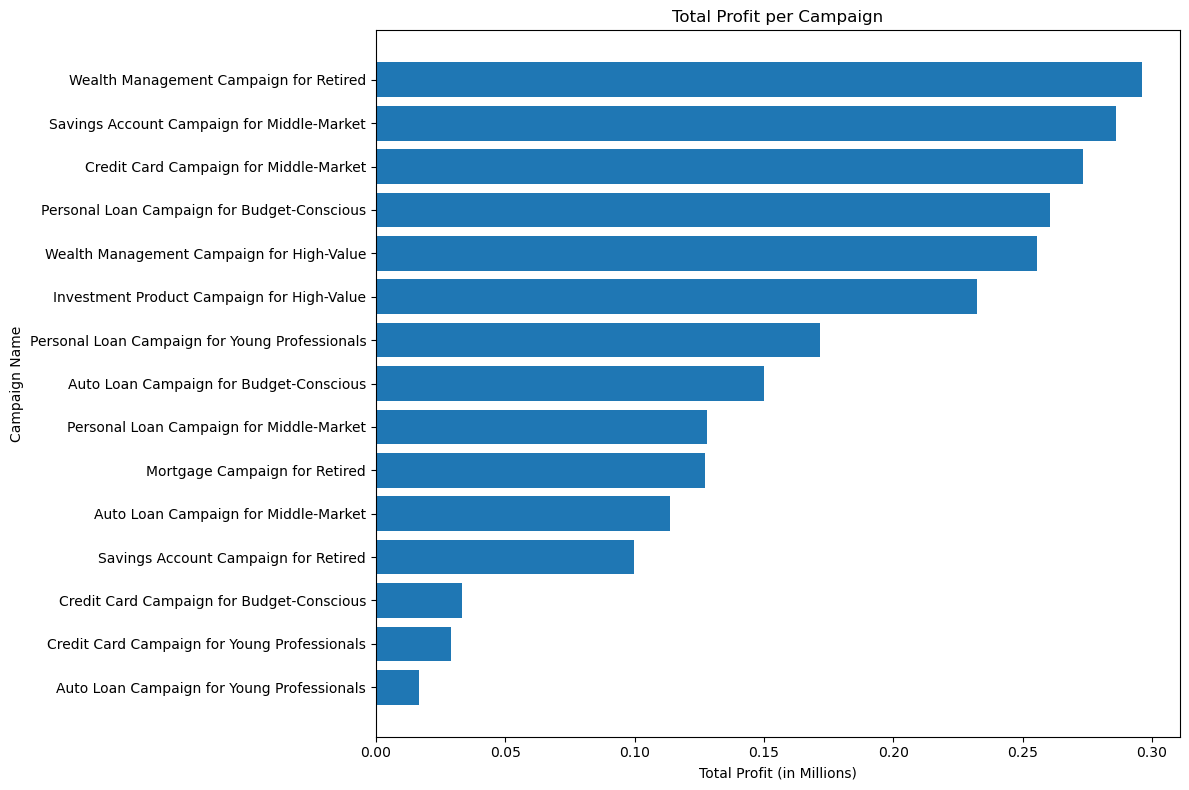

In [165]:
campaigns = profit_generated['campaign_name']
total_profits = profit_generated['total_profit']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, total_profits)

# Labels & title
plt.xlabel('Total Profit (in Millions)')
plt.ylabel('Campaign Name')
plt.title('Total Profit per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [166]:
df_m= df_m.merge(profit_generated,on="campaign_name")

In [ ]:
#filtering values
df_converted = df[df["conversion_status"]==1].copy()
df_converted_churn = df_converted[df_converted["churn_prob"]>0].copy()

#expectedlifetime of customer = 1/churn probability
#clv = monthly revenue * expected lifetime of customer
df_converted_churn["monthly_revenue"] = df_converted_churn["total_transaction_amount_12m"]/12
df_converted_churn["expected_lifetime"] = 1/df_converted_churn['churn_prob']
df_converted_churn["clv"]= df_converted_churn["monthly_revenue"] * df_converted_churn["expected_lifetime"]
clv_per_camp = df_converted_churn.groupby(["campaign_name"])["clv"].mean().reset_index().sort_values(by="clv",ascending=False)

clv_per_camp

#merge clv into main df_m
df_m=df_m.merge(clv_per_camp,on="campaign_name")

,campaign_name,clv
5,Credit Card Campaign for Young Professionals,423946.192764
11,Savings Account Campaign for Middle-Market,386661.369831
14,Wealth Management Campaign for Retired,372205.029997
7,Mortgage Campaign for Retired,371201.380252
12,Savings Account Campaign for Retired,346726.946640
8,Personal Loan Campaign for Budget-Conscious,338767.133970
4,Credit Card Campaign for Middle-Market,335801.217830
9,Personal Loan Campaign for Middle-Market,333861.908738
6,Investment Product Campaign for High-Value,329569.426680
13,Wealth Management Campaign for High-Value,320535.368679


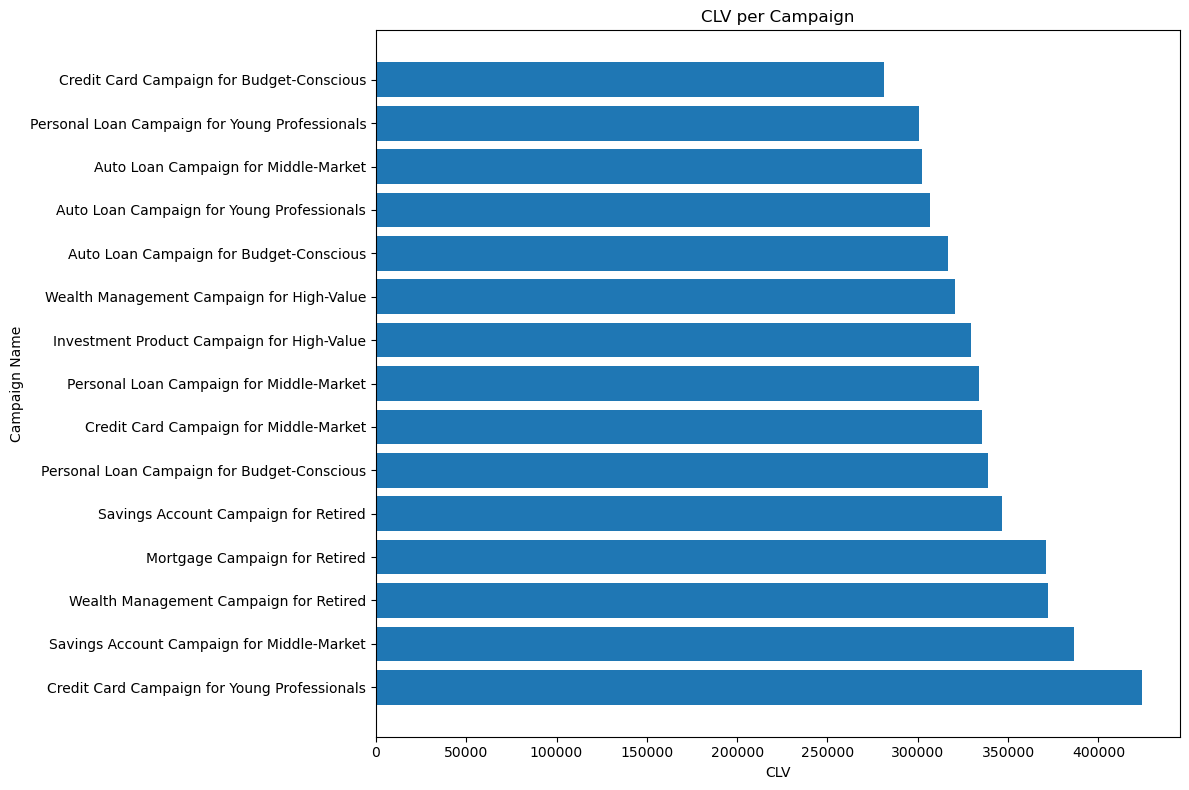

In [170]:
campaigns = clv_per_camp['campaign_name']
clv = clv_per_camp['clv']

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(campaigns, clv)

# Labels & title
plt.xlabel('CLV')
plt.ylabel('Campaign Name')
plt.title('CLV per Campaign')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [171]:
df_m[["engagement_score", "conversion_rate", "clv", "total_profit"]].corr()


,engagement_score,conversion_rate,clv,total_profit
engagement_score,1.000000,-0.270159,-0.578005,0.104862
conversion_rate,-0.270159,1.000000,0.352952,0.373096
clv,-0.578005,0.352952,1.000000,0.169031
total_profit,0.104862,0.373096,0.169031,1.000000


Text(0.5, 1.0, 'CLV vs Total Profit by Campaign')

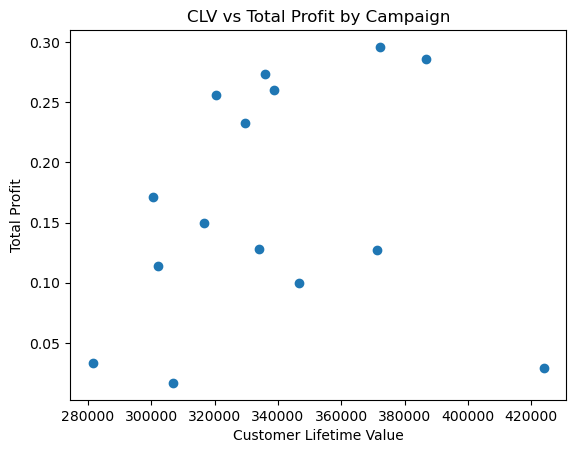

In [172]:


plt.scatter(df_m["clv"], df_m["total_profit"])
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Total Profit")
plt.title("CLV vs Total Profit by Campaign")
